# Diabetes risk analysis

## This programme aims to analayse some data to understand insights to some characteristics features and the risk of such individuals to having diabetes, build a model that estimate the risk of an individual to developp diabetes later in life and serve it to make it accessible on the web to everyone

### 1. Importing the data and other dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#creating a variable that contains the pathway to data we'll be using
pathway = "Documents/programming/data/"

In [5]:
#creating a dataframe "diabetes" that reads the csv file containing the data to be used
diabetes = pd.read_csv(pathway+"diabetes_data_upload.csv")

### 2. Data wrangling, manipulation and visualization

In [6]:
#overview of the data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


In [8]:
#description of the data
diabetes.describe(include="all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [12]:
diabetes.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [11]:
diabetes.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
120,48,Male,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,Positive
22,39,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
129,48,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Positive
483,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
42,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
147,38,Male,Yes,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Positive
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
17,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive
204,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
110,53,Female,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,Positive


In [14]:
#checking no 500 -510 and checking all their features
diabetes.iloc[500:510,:]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
500,66,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
501,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
502,70,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
503,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
504,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
505,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
506,61,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
507,60,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
508,58,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative
509,54,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [15]:
#printing the max, mean and min age
print("The the maximum age on this dataset is ", diabetes["Age"].max(), "the minimum age is ", diabetes["Age"].min(), "and the average age is ", diabetes['Age'].mean())

The the maximum age on this dataset is  90 the minimum age is  16 and the average age is  48.02884615384615


In [27]:
#filtering the data to view the number of inputs outside the 15-85 percentile based on the ages
diabetes[diabetes["Age"]<25].count()

Age                   1
Gender                1
Polyuria              1
Polydipsia            1
sudden weight loss    1
weakness              1
Polyphagia            1
Genital thrush        1
visual blurring       1
Itching               1
Irritability          1
delayed healing       1
partial paresis       1
muscle stiffness      1
Alopecia              1
Obesity               1
class                 1
dtype: int64

In [28]:
#filtering the data to view the number of inputs outside the 25-75 percentile based on the ages
diabetes[diabetes["Age"]>80].count()

Age                   4
Gender                4
Polyuria              4
Polydipsia            4
sudden weight loss    4
weakness              4
Polyphagia            4
Genital thrush        4
visual blurring       4
Itching               4
Irritability          4
delayed healing       4
partial paresis       4
muscle stiffness      4
Alopecia              4
Obesity               4
class                 4
dtype: int64

In [34]:
#viewing the data of these outliers
diabetes.loc[diabetes.Age>80]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
102,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [35]:
#viewing the data of these outliers
diabetes.loc[diabetes.Age<25]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive


In [41]:
#sorting the data based on the age
diabetes.sort_values(by= "Age", ascending = False, inplace= True)

In [42]:
diabetes.head(20)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
102,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
238,72,Male,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
284,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
372,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
103,72,Male,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
472,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative


In [43]:
diabetes.tail(20)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
225,29,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Negative
453,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
306,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
318,28,Female,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,Negative
348,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
265,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
201,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
362,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
87,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive


In [44]:
#sorting thre index back
diabetes.sort_index(axis= 0, ascending= True, inplace=True)

In [45]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [120]:
print("The mean age of males with diabetes is ",diabetes[
    (diabetes["Gender"]=="Male") & (diabetes["class"]=="Positive")]["Age"].mean(),"\n \
The mean age of females with diabetes is ",diabetes[
    (diabetes["Gender"]=="Female") & (diabetes["class"]=="Positive")]["Age"].mean())

The mean age of males with diabetes is  51.38095238095238 
 The mean age of females with diabetes is  47.10982658959538


In [92]:
print("The mean age of males without diabetes is ",diabetes[
    (diabetes["Gender"]=="Male") & (diabetes["class"]=="Negative")]["Age"].mean(),"\n \
The mean age of females without diabetes is ",diabetes[
    (diabetes["Gender"]=="Female") & (diabetes["class"]=="Negative")]["Age"].mean())

The mean age of males without diabetes is  46.3646408839779 
 The mean age of females without diabetes is  46.31578947368421


In [137]:
diabetes.groupby(["Gender","class"])["Age"].mean()

Gender  class   
Female  Negative    46.315789
        Positive    47.109827
Male    Negative    46.364641
        Positive    51.380952
Name: Age, dtype: float64

In [94]:
print("The mean age of the dataset is ",diabetes["Age"].mean(), "\n\
The mean age of males is", diabetes[diabetes["Gender"]=="Male"]["Age"].mean(), "\n\
The mean age of females is ", diabetes[diabetes["Gender"]=="Female"]["Age"].mean(), "\n\
The mean age of diabetic patients is ", diabetes[diabetes["class"]=="Positive"]["Age"].mean(), "\n\
The mean age of non diabetic patients is ",diabetes[diabetes["class"]=="Negative"]["Age"].mean())

The mean age of the dataset is  48.02884615384615 
The mean age of males is 48.61280487804878 
The mean age of females is  47.03125 
The mean age of diabetic patients is  49.071875 
The mean age of non diabetic patients is  46.36


In [138]:
diabetes.groupby("class")["Age"].mean()

class
Negative    46.360000
Positive    49.071875
Name: Age, dtype: float64

In [139]:
diabetes.groupby("Gender")["Age"].mean()

Gender
Female    47.031250
Male      48.612805
Name: Age, dtype: float64

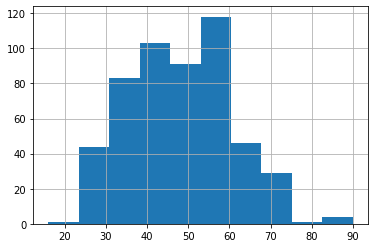

In [124]:
diabetes.Age.hist(histtype= "stepfilled", bins=10)

In [95]:
pd.crosstab(diabetes["Gender"], diabetes["class"])

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


In [96]:
pd.crosstab(diabetes["Polyuria"], diabetes["Polydipsia"])

Polydipsia,No,Yes
Polyuria,,
No,222,40
Yes,65,193


In [97]:
pd.crosstab(diabetes["Polyuria"], diabetes["class"])

class,Negative,Positive
Polyuria,,
No,185,77
Yes,15,243


In [98]:
pd.crosstab(diabetes["Polydipsia"], diabetes["class"])

class,Negative,Positive
Polydipsia,,
No,192,95
Yes,8,225


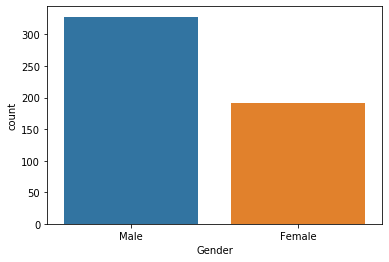

In [100]:
sns.countplot(x="Gender", data= diabetes)

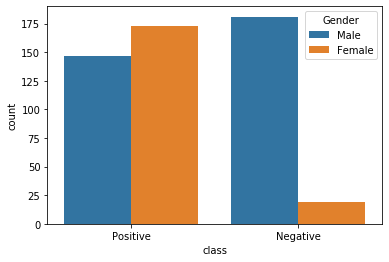

In [101]:
sns.countplot(x= "class", hue ="Gender", data= diabetes)

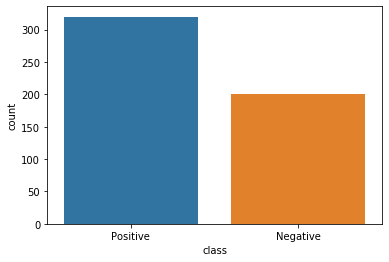

In [108]:
sns.countplot(x= "class", data = diabetes)

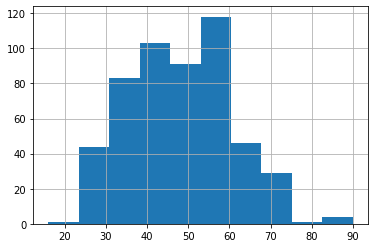

In [123]:
diabetes.Age.hist(histtype= "stepfilled",bins=10)

In [146]:
columns= list(diabetes.columns)

In [148]:
columns.remove("Age")

In [150]:
columns.remove("class")

In [155]:
for x in columns:
    print(pd.crosstab(diabetes["class"], diabetes[x]))
    print("________________________")
    print()

Gender    Female  Male
class                 
Negative      19   181
Positive     173   147
________________________

Polyuria   No  Yes
class             
Negative  185   15
Positive   77  243
________________________

Polydipsia   No  Yes
class               
Negative    192    8
Positive     95  225
________________________

sudden weight loss   No  Yes
class                       
Negative            171   29
Positive            132  188
________________________

weakness   No  Yes
class             
Negative  113   87
Positive  102  218
________________________

Polyphagia   No  Yes
class               
Negative    152   48
Positive    131  189
________________________

Genital thrush   No  Yes
class                   
Negative        167   33
Positive        237   83
________________________

visual blurring   No  Yes
class                    
Negative         142   58
Positive         145  175
________________________

Itching    No  Yes
class             
Negative  101   99
Pos

In [163]:
d={"No":0, "Yes":1}
columns.remove("Gender")

ValueError: list.remove(x): x not in list

In [164]:
columns

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [168]:
for i in columns:
    diabetes[i].replace(d, inplace=True)

In [169]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [170]:
g={"Female":0, "Male":1}
diabetes["Gender"].replace(g, inplace= True)

In [172]:
c={"Negative":0, "Positive":1}
diabetes["class"].replace(c, inplace= True)

In [173]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [176]:
diabetes1= np.array(diabetes.values)

In [177]:
diabetes1

array([[40,  1,  0, ...,  1,  1,  1],
       [58,  1,  0, ...,  1,  0,  1],
       [41,  1,  1, ...,  1,  0,  1],
       ...,
       [58,  0,  1, ...,  0,  1,  1],
       [32,  0,  0, ...,  1,  0,  0],
       [42,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [179]:
Y=diabetes1[:,-1 ]

In [183]:
x=diabetes1[:,:-1]

In [181]:
diabetes1.shape

(520, 17)

In [185]:
x.shape

(520, 16)

In [186]:
Y.shape

(520,)

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=18)

In [188]:
logit= LogisticRegression(C=0.001, random_state=18)

In [190]:
logit.fit(X_train,Y_train)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=18, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
logit.score(X_test,Y_test)

0.6346153846153846

In [192]:
scores={}

In [193]:
scores["c=0.001"]= logit.score(X_test,Y_test)

In [194]:
scores

{'c=0.001': 0.6346153846153846}

In [195]:
logit= LogisticRegression(C=0.01, random_state=18)
logit.fit(X_train,Y_train)
scores["c=0.01"]= logit.score(X_test,Y_test)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [196]:
scores

{'c=0.001': 0.6346153846153846, 'c=0.01': 0.8269230769230769}

In [197]:
logit= LogisticRegression(C=0.1, random_state=18)
logit.fit(X_train,Y_train)
scores["c=0.1"]= logit.score(X_test,Y_test)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [199]:
scores

{'c=0.001': 0.6346153846153846,
 'c=0.01': 0.8269230769230769,
 'c=0.1': 0.8942307692307693}

In [200]:
logit= LogisticRegression(C=1, random_state=18)
logit.fit(X_train,Y_train)
scores["c=1"]= logit.score(X_test,Y_test)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [201]:
scores

{'c=0.001': 0.6346153846153846,
 'c=0.01': 0.8269230769230769,
 'c=0.1': 0.8942307692307693,
 'c=1': 0.9326923076923077}

In [202]:
logit= LogisticRegression(C=10, random_state=18)
logit.fit(X_train,Y_train)
scores["c=10"]= logit.score(X_test,Y_test)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
scores

{'c=0.001': 0.6346153846153846,
 'c=0.01': 0.8269230769230769,
 'c=0.1': 0.8942307692307693,
 'c=1': 0.9326923076923077,
 'c=10': 0.9326923076923077}

In [205]:
tree= DecisionTreeClassifier(max_depth= 5, random_state=19)
tree.fit(X_train,Y_train)
scores["Decision tree"]= accuracy_score(Y_test, tree.predict(X_test))

In [206]:
scores

{'c=0.001': 0.6346153846153846,
 'c=0.01': 0.8269230769230769,
 'c=0.1': 0.8942307692307693,
 'c=1': 0.9326923076923077,
 'c=10': 0.9326923076923077,
 'Decision tree': 0.9134615384615384}

In [210]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
scores["KNN"]= accuracy_score(Y_test, knn.predict(X_test))

In [211]:
scores

{'c=0.001': 0.6346153846153846,
 'c=0.01': 0.8269230769230769,
 'c=0.1': 0.8942307692307693,
 'c=1': 0.9326923076923077,
 'c=10': 0.9326923076923077,
 'Decision tree': 0.9134615384615384,
 'KNN': 0.8653846153846154}

In [ ]:
class NeuralNetwork:
    def __init__(self, data):
        self.__data= data
        self.__

In [215]:
N1= 5 #no of nodesin the first layer
N2= 1  #no of nodes in the second layer

def dimensions(data):
    n= data.shape[1]
    m= data.shape[0]
    return n,m

def sigmoid(x):
    return 1/1+np.exp(-x)

def initialization():
    W1= np.random.random((N1,n))
    b1= np.random.random((N1,m))
    W2- np.random.random((N2,N1))
    b2= np.random.random((N2,m))
    params= {"W1":W1, "b1":b1, "W2":W2, "b2":b2 }
    return params

def feedforward(X, params):
    W1= params["W1"]
    W2= params["W2"]
    b1= params["b1"]
    b2= params["b2"]
    Z1 = W1 @ X.T +b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b1
    A2 = sigmoid(Z2)
    weights = {"Z1":Z1,"Z2": Z2, "A1": A1, "A2": A2}
    return weights

def cost_function(weights, Y):
    A2 = weights["A2"]
    J= 1/m * np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))
    return J

def backprop()